# Analysis of stroke type and pre-stroke modified Rankin Scale by age

The proportion of stroke types (haemorrhagic, nlvo ischaemic, lvo ischaemic) are shown by age.

NIHSS of 0-10, and 11+, are taken as surrogates of nlvo and lvo respectively.

The average mRS (modified Rankin Scale) is shown by age.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Change default colour scheme:
plt.style.use('seaborn-colorblind')

# import data
data = pd.read_csv(
    './../data/2019-11-04-HQIP303-Exeter_MA.csv', low_memory=False)

Get occurance of ischaemic and haemorrgahic by age

In [2]:
ages = []
for group in data.S1AgeOnArrival.values:
    minage, maxage = group.split(',')
    
    minage = int(''.join(list(minage)[1:]))
    maxage = int(''.join(list(maxage)[:-1]))
    
    ages.append(np.median([minage,maxage]))
    
data['Age_midpoint'] = ages

# Censor data to 40-100
mask = (data['Age_midpoint'] > 50) & (data['Age_midpoint'] <100)
data = data[mask]

# Remove unknown stroke stype or NIHSS
data.dropna(subset=['S2StrokeType'], inplace=True)
data.dropna(subset=['S2NihssArrival'], inplace=True)

# Add row for counting
data['count'] = 1

In [3]:
results = pd.DataFrame()
results.index.name='Age midpoint'

# Count all by age 
results['all'] = data.groupby('Age_midpoint').count()['count']

# Get ischaemic strokes
mask = data['S2StrokeType'] == 'Infarction'
results['infarction'] = data[mask].groupby('Age_midpoint').count()['count']

# Get haemorrhagic stroke
mask = data['S2StrokeType'] == 'Primary Intracerebral Haemorrhage'
results['haemorrhage'] = data[mask].groupby('Age_midpoint').count()['count']

# Calculate proportion haemorrhagic
results['prop_haemorrhage'] = results['haemorrhage'] / results['all']

# Show results
results

,all,infarction,haemorrhage,prop_haemorrhage
Age midpoint,,,,
52.5,9334,8346,988,0.105850
57.5,12394,11235,1159,0.093513
62.5,15967,14359,1608,0.100708
67.5,21406,19130,2276,0.106325
72.5,28421,25049,3372,0.118645
77.5,33288,29138,4150,0.124670
82.5,37404,32638,4766,0.127420
87.5,32585,28577,4008,0.123001
92.5,18260,16298,1962,0.107448


Add breakdown of ischaemic strokes by nLVO (NIHSS 0-10) and LVO (NIHSS 11+)

In [4]:
# NIHSS 0-10 is a surrogate for non large vessel occlusions
mask = (data['S2StrokeType'] == 'Infarction') & (data['S2NihssArrival'] < 11)
results['nlvo'] = data[mask].groupby('Age_midpoint').count()['count']

# NIHSS 11+ is a surrogate for non large vessel occlusions
mask = (data['S2StrokeType'] == 'Infarction') & (data['S2NihssArrival'] >10)
results['lvo'] = data[mask].groupby('Age_midpoint').count()['count']

# Calculate proportions
results['prop_nlvo'] = results['nlvo'] / results['all']
results['prop_lvo'] = results['lvo'] / results['all']

# Check proportions add up
results['checksum'] = \
    results['prop_haemorrhage'] + results['prop_nlvo'] + results['prop_lvo']

# Show results
results

,all,infarction,haemorrhage,prop_haemorrhage,nlvo,lvo,prop_nlvo,prop_lvo,checksum
Age midpoint,,,,,,,,,
52.5,9334,8346,988,0.105850,7188,1158,0.770088,0.124063,1.0
57.5,12394,11235,1159,0.093513,9668,1567,0.780055,0.126432,1.0
62.5,15967,14359,1608,0.100708,12197,2162,0.763888,0.135404,1.0
67.5,21406,19130,2276,0.106325,16022,3108,0.748482,0.145193,1.0
72.5,28421,25049,3372,0.118645,20452,4597,0.719609,0.161747,1.0
77.5,33288,29138,4150,0.124670,22826,6312,0.685713,0.189618,1.0
82.5,37404,32638,4766,0.127420,24391,8247,0.652096,0.220484,1.0
87.5,32585,28577,4008,0.123001,19777,8800,0.606936,0.270063,1.0
92.5,18260,16298,1962,0.107448,10305,5993,0.564348,0.328204,1.0


Plot results

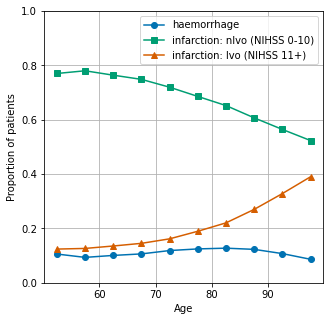

In [5]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.plot(results['prop_haemorrhage'], marker='o', label='haemorrhage')
ax.plot(results['prop_nlvo'], marker='s', label='infarction: nlvo (NIHSS 0-10)')
ax.plot(results['prop_lvo'], marker = '^', label='infarction: lvo (NIHSS 11+)')
ax.set_ylabel('Proportion of patients')
ax.set_xlabel('Age')
ax.set_ylim(0, 1)
ax.grid()
plt.legend()
plt.savefig('./output/stroke_type_by_age.jpg', dpi=300)
plt.show()

## Show mRS by age

In [6]:
mrs_results = pd.DataFrame()
mrs_results.index.name='Age midpoint'
# Get prestroke mRS for all patients
mrs_results['all'] = data.groupby('Age_midpoint').mean()['S2RankinBeforeStroke']

# Get prestroke mRS for haemorrgagic patients
mask = data['S2StrokeType'] == 'Primary Intracerebral Haemorrhage'
mrs_results['haemorrhage'] = \
    data[mask].groupby('Age_midpoint').mean()['S2RankinBeforeStroke']

# Get prestroke mRS for nlvo patients
mask = (data['S2StrokeType'] == 'Infarction') & (data['S2NihssArrival'] < 11)
mrs_results['nlvo'] = \
    data[mask].groupby('Age_midpoint').mean()['S2RankinBeforeStroke']

# Get prestroke mRS for lvo patients
mask = (data['S2StrokeType'] == 'Infarction') & (data['S2NihssArrival'] >10)
mrs_results['lvo'] = \
    data[mask].groupby('Age_midpoint').mean()['S2RankinBeforeStroke']

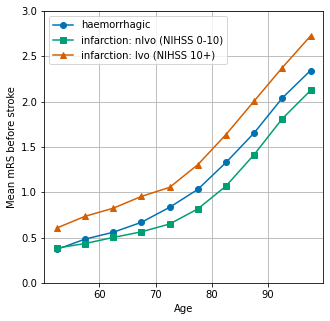

In [7]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.plot(mrs_results['haemorrhage'], marker = 'o', label='haemorrhagic')
ax.plot(mrs_results['nlvo'], marker = 's', label='infarction: nlvo (NIHSS 0-10)')
ax.plot(mrs_results['lvo'], marker = '^', label='infarction: lvo (NIHSS 10+)')
ax.set_ylabel('Mean mRS before stroke')
ax.set_xlabel('Age')
ax.set_ylim(0, 3)
ax.legend()
ax.grid()
plt.savefig('./output/mrs_by_age.jpg', dpi=300)
plt.show()